# Merger rate density evolution with redshift

## Compact Binaries Merger Rate Density

The merger rate density is a crucial parameter for understanding the population of compact binary mergers, including binary black holes (BBH), binary neutron stars (BNS), and neutron star-black hole (NSBH) systems. It quantifies the number of mergers occurring per unit volume per unit time. The merger rate density is typically expressed in units of $\text{Gpc}^{-3} \text{yr}^{-1}$ or $\text{Mpc}^{-3} \text{yr}^{-1}$ and varies with redshift ($z$).

For available models for merger rate density, see the example section.

### Merger Rate Density Formula

The default merger rate density in ler follows the model presented in [WIERDA et al. 2021](https://arxiv.org/pdf/2106.06303.pdf). This model is a functional fit to the population I/II star merger-rate density, normalized to the local merger rate density. It extends from the M10 model to the Belczynski et al. (2017) model, which incorporates the metallicity dependence of the star formation rate, influenced by pair-instability supernova (PSN) and pair-instability pulsation supernova (PPSN) effects.

The merger rate density in the source frame is given by:

\begin{equation}
\mathcal{R}(z_s) = \frac{\mathcal{R}_O(b_4+1)e^{b_2 z_s}}{b_4+e^{b_3 z_s}} \text{Gpc}^{-3}\text{yr}^{-1} \tag{1}
\end{equation}

- Where $z_s$ is the redshift of the source.
- The local merger rate $\mathcal{R}_O$ and fitting parameters $b_2$, $b_3$, and $b_4$ are specific to each model.

The following table provides the local merger rate $\mathcal{R}_O$ for different compact binary models (refer to [GWTC-3 IV A](https://journals.aps.org/prx/pdf/10.1103/PhysRevX.13.011048)):

| Model | $\mathcal{R}_O$ ($\text{Gpc}^{-3} \text{yr}^{-1}$) |
|-------|------------------------------------|
| BNS   | $105.5^{+190.2}_{-83.9}$           |
| BBH   | $23.9^{+14.9}_{-8.6}$              |
| NSBH  | $45^{+75}_{-33}$                   |


**Note:** The merger rate density models and parameters are subject to updates based on new observational data and theoretical developments.

### Normalized redshift distribution

Let the un-normalized redshift distribution given by, 

\begin{equation}
P_{\text{unorm}}(z_s) = \frac{\mathcal{R}(z_s)}{(1+z_s)} \frac{dV_c}{dz_s} \tag{2}
\end{equation}

where $dV_c/dz_s$ is the differential comoving volume element and $\frac{1}{1+z_s}$ is the time dilation factor.

The normalizing factor $\mathcal{N}^U$ can be calculated as,

\begin{equation}
\mathcal{N}^U = \int_{z_{\text{min}}}^{z_{\text{max}}} P_{\text{unorm}}(z_s) dz_s = \int_{z_{\text{min}}}^{z_{\text{max}}} \frac{\mathcal{R}(z_s)}{(1+z_s)} \frac{dV_c}{dz_s} dz_s \tag{3}
\end{equation}

where $z_{\text{min}}$ and $z_{\text{max}}$ are the minimum and maximum redshifts considered for the calculation. Now we can write the normalized redshift distribution as,

\begin{equation}
P(z_s) = \frac{P_{\text{unorm}}(z_s)}{\mathcal{N}^U} \tag{4}
\end{equation}


$P(z_s)$ is the probability distribution of the source redshift $z_s$.

Let's understand CBCSourceRedshiftDistribution class and it's attributes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

# calling necessary class from ler package
from ler.gw_source_population import CBCSourceRedshiftDistribution

Setting multiprocessing start method to 'fork'


In [2]:
# uncomment the following line to see the docstring
# CBCSourceRedshiftDistribution?

In [3]:
# class initialization
# default model "BBH popI/II Oguri2018"
cbc = CBCSourceRedshiftDistribution()

# list out the models for the merger rate density wrt redshift
print("\n available model list with it input parameters: \n", cbc.merger_rate_density_model_list)


Initializing CBCSourceRedshiftDistribution...

luminosity_distance interpolator will be loaded from ./interpolator_json/luminosity_distance/luminosity_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_0.pickle
using ler available merger rate density model: merger_rate_density_bbh_popI_II_oguri2018
merger_rate_density_bbh_popI_II_oguri2018 interpolator will be loaded from ./interpolator_json/merger_rate_density/merger_rate_density_bbh_popI_II_oguri2018_0.pickle
merger_rate_density_detector_frame interpolator will be loaded from ./interpolator_json/merger_rate_density/merger_rate_density_detector_frame_1.pickle

 available model list with it input parameters: 
 {'merger_rate_density_bbh_popI_II_oguri2018': {'R0': 2.39e-08, 'b2': 1.6, 'b3': 2.0, 'b4': 30}, 'star_formation_rate_madau_dickinson2014': {'af': 2.7, 'bf': 5.6, 'cf': 2.9}, 'merger_rate_density_bbh_popIII_ken2022': {'n0': 

### Plotting differential comoving volume

* This important to understand why the source frame merger rate decreases with redshift
* This is with LambdaCDM(H0=70, Om0=0.3, Ode0=0.7) cosmology. `ler` allows you to change the cosmology.
* Given, $1/E (z)$: derivative of comoving distance with redshift, $D_c(z)$: comoving distance, $H_0$: Hubble constant, $c$: speed of light, diffrential comoving volume is given by:

\begin{equation}
\frac{dV_c}{dz} = 4\pi \frac{c}{H_0} \frac{(1+z)^2 D_c^2(z)}{E(z)}
\end{equation}

* A factor of $4\pi$ is included to indicate the spherical volume element.

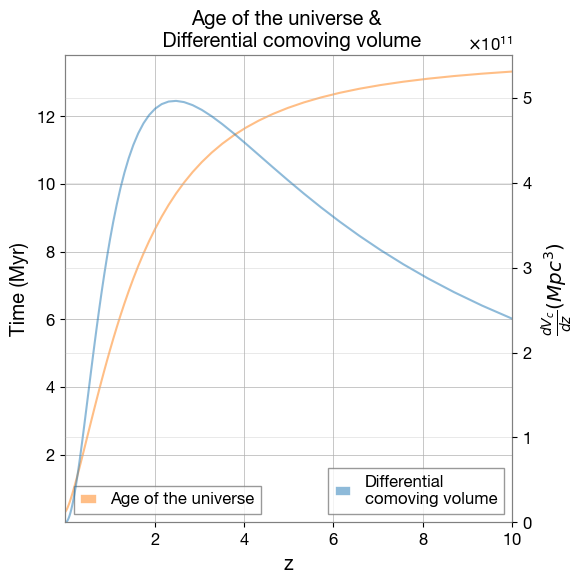

In [4]:
# age of the universe (from present day) in years wrt to redshift
# consider z=0 corresponds to present day t=0
z = np.geomspace(0.001, 10, 100)
t = 13.786885302009708-cbc.cosmo.age(z).value

# differential comoving volume wrt to redshift
z = np.geomspace(0.01, 10, 100)
dVc_dz = cbc.differential_comoving_volume(z)

# plot the differential comoving volume and age of the universe
# show differential comoving volume scale on the right y-axis
# show age of the universe scale on the left y-axis
plt.figure(figsize=(6,6))
plt.plot(z, t, color='C1', linestyle='-', alpha=0.5, label="Age of the universe")
plt.legend(loc="lower left")
plt.ylabel("Time (Myr)")
plt.xlabel("z")
plt.ylim([0.001, 13.8])
plt.twinx()
plt.plot(z, dVc_dz, color='C0', linestyle='-', alpha=0.5, label="Differential\ncomoving volume")
plt.ylabel(r"$\frac{dV_c}{dz} (Mpc^3)$")
plt.title("Age of the universe & \n Differential comoving volume")
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.ylim([0.001, 5.5e11])
plt.xlim([0.001, 10])
plt.tight_layout()
plt.show()

### Merger rate evolution with redshift (source frame)

In [6]:
z_min = 0.0
z_max = 10.0
# class initialisation
# merger_rate_density_bbh_popI_II_oguri2018 is the default
cbc = CBCSourceRedshiftDistribution(z_min=z_min, 
                                  z_max=z_max,
                                  event_type="BBH",
                                  #merger_rate_density="merger_rate_density_bbh_popI_II_oguri2018",
                                  cosmology=cosmo,
                                  )


Initializing CBCSourceRedshiftDistribution...

luminosity_distance interpolator will be loaded from ./interpolator_json/luminosity_distance/luminosity_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_0.pickle
using ler available merger rate density model: merger_rate_density_bbh_popI_II_oguri2018
merger_rate_density_bbh_popI_II_oguri2018 interpolator will be loaded from ./interpolator_json/merger_rate_density/merger_rate_density_bbh_popI_II_oguri2018_2.pickle
merger_rate_density_detector_frame interpolator will be loaded from ./interpolator_json/merger_rate_density/merger_rate_density_detector_frame_3.pickle


In [7]:
# looking for local merger rate density (R0)
# by default, it uses results GWTC-3
cbc.merger_rate_density(0.0)  # in units of Mpc^-3 yr^-1. Alterntively, you can use cbc.merger_rate_density.function(0.0)

array([2.39e-08])

* `merger_rate_density` is a class method which also has a callcack function to get the merger rate density value directly.
* it has the following attributes:
  * `function`: to get the merger rate density value at a given redshift
  * `pdf`: to get the probability density function of the merger rate density at a given redshift
  * `rvs`: to get the random samples of the merger rate density at a given redshift
  etc.

In [8]:
zs = np.random.uniform(z_min, z_max, 2)
size = 2

print(f"PDF source redshifts {zs}: {cbc.merger_rate_density.pdf(zs)}") 
print(f"samples of source redshifts: {cbc.merger_rate_density.rvs(size)}")

PDF source redshifts [9.06960984 7.18509957]: [0.02064374 0.04386863]
samples of source redshifts: [4.78183501 1.75646511]


## Plots with uncertainties in local merger rate density

### BBH

In [10]:
from ler.gw_source_population import merger_rate_density_bbh_popI_II_oguri2018
z = np.geomspace(0.01, 5.0, 200)

# getting the median values of zs distribution (source frame)
bbh_density_median_det = merger_rate_density_bbh_popI_II_oguri2018(z, R0=23.9 * 1e-9, b2=1.6, b3=2.0, b4=30)

# getting the lower bound values of zs distribution (source frame)
bbh_density_low_det = merger_rate_density_bbh_popI_II_oguri2018(z, R0=(23.9-8.6) * 1e-9, b2=1.6, b3=2.0, b4=30)

# getting the upper bound values of zs distribution (source frame)
bbh_density_up_det = merger_rate_density_bbh_popI_II_oguri2018(z, R0=(23.9+14.9) * 1e-9, b2=1.6, b3=2.0, b4=30)

In [12]:
cbc = CBCSourceRedshiftDistribution(z_min=z_min, 
                                  z_max=z_max,
                                  event_type="BBH",
                                  #merger_rate_density="merger_rate_density_bbh_popI_II_oguri2018",
                                  #cosmology=cosmo,
                                  #merger_rate_density_param=dict(R0=23.9 * 1e-9, b2=1.6, b3=2.0, b4=30)
                                  )
zs_pdf = cbc.source_redshift.pdf(z)


Initializing CBCSourceRedshiftDistribution...

luminosity_distance interpolator will be loaded from ./interpolator_json/luminosity_distance/luminosity_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_0.pickle
using ler available merger rate density model: merger_rate_density_bbh_popI_II_oguri2018
merger_rate_density_bbh_popI_II_oguri2018 interpolator will be loaded from ./interpolator_json/merger_rate_density/merger_rate_density_bbh_popI_II_oguri2018_2.pickle
merger_rate_density_detector_frame interpolator will be loaded from ./interpolator_json/merger_rate_density/merger_rate_density_detector_frame_3.pickle


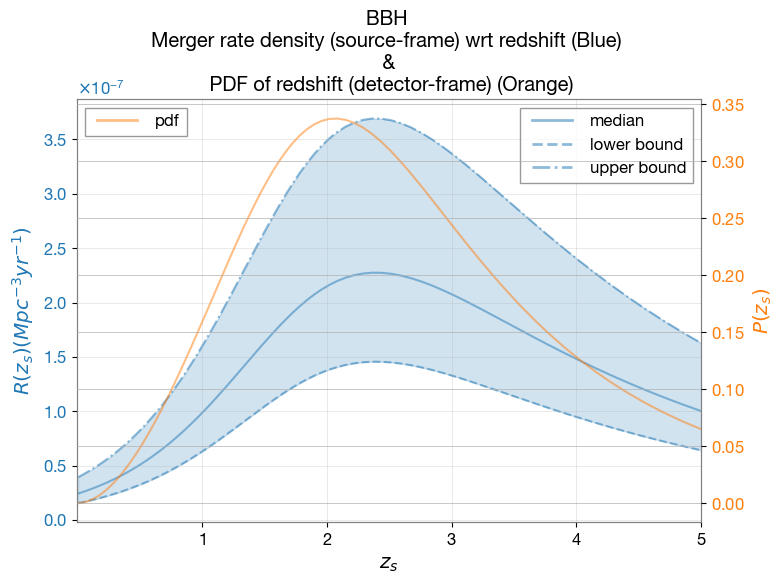

In [13]:
fig, ax1 = plt.subplots(figsize=(8,6))

color = 'C0'
ax1.set_xlabel(r'$z_s$')
ax1.set_ylabel(r"$R(z_s) (Mpc^{-3} yr^{-1})$", color=color)
ax1.plot(z, bbh_density_median_det, color=color, linestyle='-', alpha=0.5, label="median")
ax1.plot(z, bbh_density_low_det, color=color, linestyle='--', alpha=0.5, label="lower bound")
ax1.plot(z, bbh_density_up_det, color=color, linestyle='-.', alpha=0.5, label="upper bound")
# ax1.plot(z, bbh_density_median_det/(1+z), color='C2', linestyle='--', alpha=0.5, label="det frame")
ax1.fill_between(z, bbh_density_low_det, bbh_density_up_det, color=color, alpha=0.2)
ax1.tick_params(axis='y', labelcolor=color)
# grid
ax1.grid(alpha=0.4)
# legend
legend = ax1.legend(loc='upper right', handlelength=3)
# Modify line width for legend entries
for handle in legend.get_lines():
    handle.set_linewidth(2)  # Set legend line width to be thinner
# x-range
ax1.set_xlim(0.001, 5)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'C1'
ax2.set_ylabel(r'$P(z_s)$', color=color)  # we already handled the x-label with ax1
ax2.plot(z, zs_pdf, color=color, linestyle='-', alpha=0.5, label="pdf")
ax2.tick_params(axis='y', labelcolor=color)
# legend
legend = ax2.legend(loc='upper left', handlelength=3)
# Modify line width for legend entries
for handle in legend.get_lines():
    handle.set_linewidth(2)  # Set legend line width to be thinner

plt.title("BBH \nMerger rate density (source-frame) wrt redshift (Blue) \n & \n PDF of redshift (detector-frame) (Orange)")
plt.tight_layout()
plt.savefig("BBH_Merger_rate_density_and_PDF_of_redshift.png")
plt.show()

In [14]:
# you can also get the merger rate density detector frame as 
cbc.source_redshift.function(z)[:5]

array([2.35090277, 2.50211146, 2.66303706, 2.83430306,
       3.0165729 ])

### BNS

In [19]:
from ler.gw_source_population import merger_rate_density_bbh_popI_II_oguri2018
z = np.geomspace(0.01, 5.0, 200)

# # getting the median values of zs distribution (source frame)
# bbh_density_median_det = merger_rate_density_bbh_popI_II_oguri2018(z, R0=105.5 * 1e-9, b2=1.6, b3=2.0, b4=30)

# getting the lower bound values of zs distribution (source frame)
bbh_density_low_det = merger_rate_density_bbh_popI_II_oguri2018(z, R0=(105.5-83.9) * 1e-9, b2=1.6, b3=2.0, b4=30)

# getting the upper bound values of zs distribution (source frame)
bbh_density_up_det = merger_rate_density_bbh_popI_II_oguri2018(z, R0=(105.5+190.2) * 1e-9, b2=1.6, b3=2.0, b4=30)

In [20]:
cbc = CBCSourceRedshiftDistribution(z_min=z_min, 
                                  z_max=z_max,
                                    event_type="BNS",
                                  #merger_rate_density="merger_rate_density_bbh_popI_II_oguri2018",
                                  #cosmology=cosmo,
                                  #merger_rate_density_param=dict(R0=105.5 * 1e-9, b2=1.6, b3=2.0, b4=30)
                                  )
zs_pdf = cbc.source_redshift.pdf(z)
bbh_density_median_det = cbc.merger_rate_density(z)


Initializing CBCSourceRedshiftDistribution...

luminosity_distance interpolator will be loaded from ./interpolator_json/luminosity_distance/luminosity_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_0.pickle
using ler available merger rate density model: merger_rate_density_bbh_popI_II_oguri2018
merger_rate_density_bbh_popI_II_oguri2018 interpolator will be loaded from ./interpolator_json/merger_rate_density/merger_rate_density_bbh_popI_II_oguri2018_9.pickle
merger_rate_density_detector_frame interpolator will be loaded from ./interpolator_json/merger_rate_density/merger_rate_density_detector_frame_10.pickle


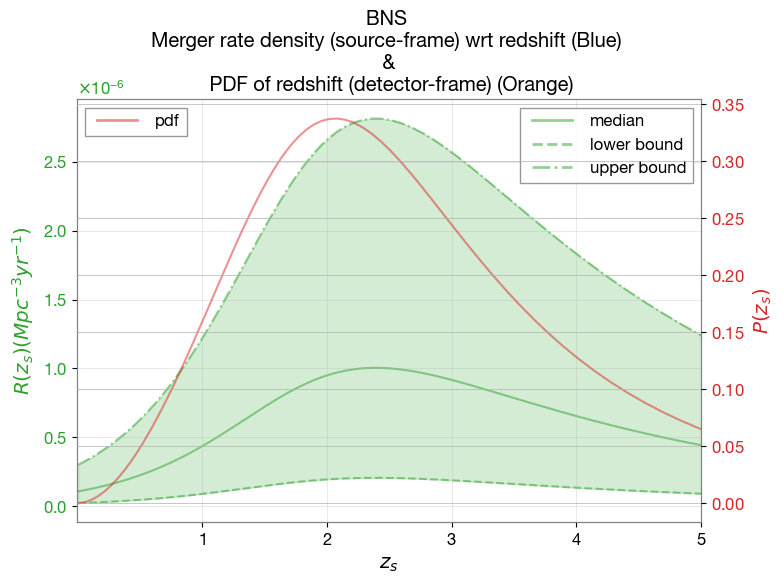

In [21]:
fig, ax1 = plt.subplots(figsize=(8, 6))

color = 'C2'
ax1.set_xlabel(r'$z_s$')
ax1.set_ylabel(r"$R(z_s) (Mpc^{-3} yr^{-1})$", color=color)
ax1.plot(z, bbh_density_median_det, color=color, linestyle='-', alpha=0.5, label="median")
ax1.plot(z, bbh_density_low_det, color=color, linestyle='--', alpha=0.5, label="lower bound")
ax1.plot(z, bbh_density_up_det, color=color, linestyle='-.', alpha=0.5, label="upper bound")
# ax1.plot(z, bbh_density_median_det/(1+z), color='C2', linestyle='--', alpha=0.5, label="det frame")
ax1.fill_between(z, bbh_density_low_det, bbh_density_up_det, color=color, alpha=0.2)
ax1.tick_params(axis='y', labelcolor=color)
# grid
ax1.grid(alpha=0.4)
# legend
legend = ax1.legend(loc='upper right', handlelength=3)
# Modify line width for legend entries
for handle in legend.get_lines():
    handle.set_linewidth(2)  # Set legend line width to be thinner
# x-range
ax1.set_xlim(0.001, 5)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'C3'
ax2.set_ylabel(r'$P(z_s)$', color=color)  # we already handled the x-label with ax1
ax2.plot(z, zs_pdf, color=color, linestyle='-', alpha=0.5, label="pdf")
ax2.tick_params(axis='y', labelcolor=color)
# legend
legend = ax2.legend(loc='upper left', handlelength=3)
# Modify line width for legend entries
for handle in legend.get_lines():
    handle.set_linewidth(2)  # Set legend line width to be thinner

plt.title("BNS \nMerger rate density (source-frame) wrt redshift (Blue) \n & \n PDF of redshift (detector-frame) (Orange)")
plt.tight_layout()
plt.savefig("BNS_Merger_rate_density_and_PDF_of_redshift.png")
plt.show()

* The uncertainity in BNS merger rate density is much larger than BBH.

In [22]:
# looking at the merger rate density parameters for BNS
cbc.merger_rate_density_param

{'R0': 1.0550000000000001e-07, 'b2': 1.6, 'b3': 2.0, 'b4': 30}